In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from disease_prediction import CardioData

filepath = "cardio_train.csv"
cardio = CardioData(filepath)
cardio.clean_data()
cardio.blood_pressure()
cardio.calculate_bmi()
df = cardio.df
df1 , df2 = cardio.data_set()
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_category,BMI,BMI_category
0,50,2,168,62.0,110,80,1,1,0,0,1,0,Hypertension,21.967120,Normal_range
1,55,1,156,85.0,140,90,3,1,0,0,1,1,Stage 2 hypertension,34.927679,Obese (class I)
2,51,1,165,64.0,130,70,3,1,0,0,0,1,Hypertension,23.507805,Normal_range
3,48,2,169,82.0,150,100,1,1,0,0,1,1,Stage 2 hypertension,28.710479,Over_weight
4,47,1,156,56.0,100,60,1,1,0,0,0,0,Healty,23.011177,Normal_range


In [60]:
df['blood_category'].value_counts()

blood_category
Hypertension            27671
Stage 2 hypertension    23298
Healty                   9556
Stage 1 hypertension     4789
Elevated                 3109
Hypertension crisis       352
Name: count, dtype: int64

In [61]:
df[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,68775.000000,68775.000000
mean,126.614846,81.382043
std,16.763475,9.676889
min,60.000000,40.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,240.000000,190.000000


In [62]:
df['BMI_category'].value_counts()

BMI_category
Normal_range         25453
Over_weight          24671
Obese (class I)      11957
Obese (class II)      4235
Obese (class III)     1816
Under_weight           643
Name: count, dtype: int64

In [63]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000
mean,52.828513,1.348731,164.361410,74.122217,126.614846,81.382043,1.364740,1.226012,0.088012,0.053639,0.803373,0.494904,27.522828
std,6.769183,0.476572,8.185149,14.331281,16.763475,9.676889,0.678999,0.571989,0.283314,0.225305,0.397451,0.499978,6.050284
min,29.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,64.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68775 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             68775 non-null  int64  
 1   gender          68775 non-null  int64  
 2   height          68775 non-null  int64  
 3   weight          68775 non-null  float64
 4   ap_hi           68775 non-null  int64  
 5   ap_lo           68775 non-null  int64  
 6   cholesterol     68775 non-null  int64  
 7   gluc            68775 non-null  int64  
 8   smoke           68775 non-null  int64  
 9   alco            68775 non-null  int64  
 10  active          68775 non-null  int64  
 11  cardio          68775 non-null  int64  
 12  blood_category  68775 non-null  object 
 13  BMI             68775 non-null  float64
 14  BMI_category    68775 non-null  object 
dtypes: float64(2), int64(11), object(2)
memory usage: 8.4+ MB


## EDA

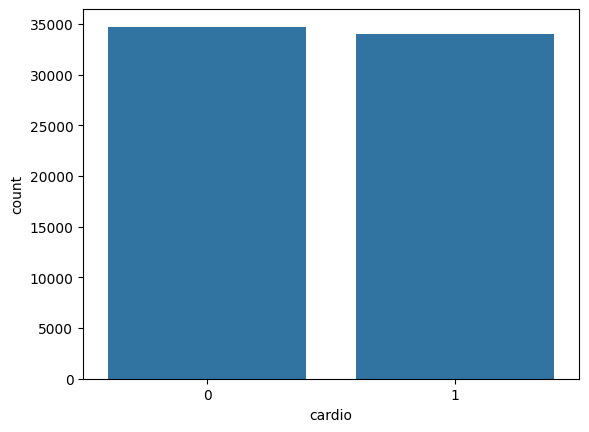

cardio
0    34738
1    34037
Name: count, dtype: int64

In [65]:
sns.countplot(data=df, x= 'cardio')
plt.show()
df['cardio'].value_counts()

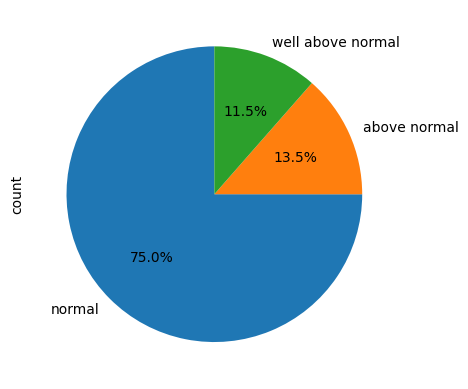

In [66]:
df['cholesterol'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,labels=["normal", "above normal", "well above normal"])
plt.show()

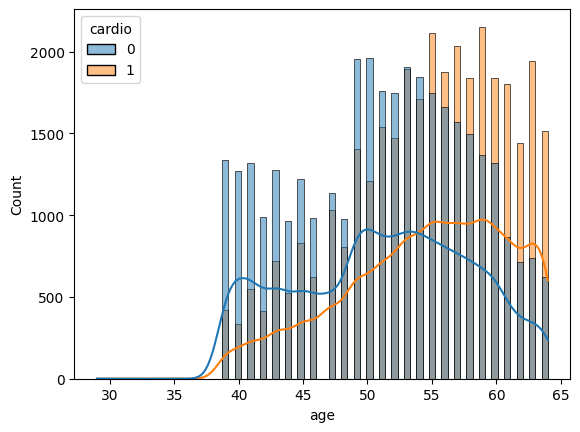

In [67]:

sns.histplot(data=df, x='age', hue='cardio', kde=True)
plt.show()


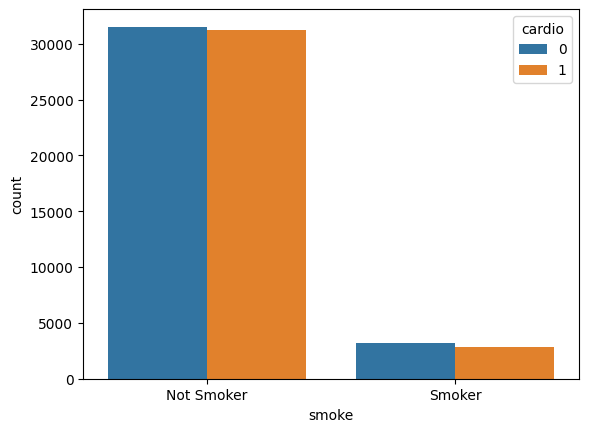

In [68]:

sns.countplot(data=df, x='smoke', hue='cardio')
plt.xticks([0,1], labels= ["Not Smoker", "Smoker"])
plt.show()

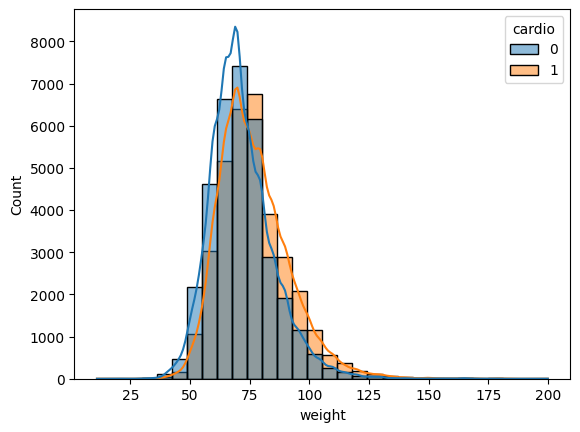

In [69]:
sns.histplot(df , x= 'weight', hue='cardio', bins= 30, kde=True)
plt.show()

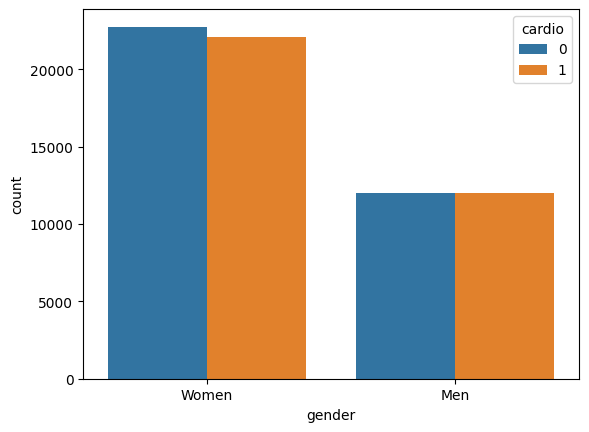

In [70]:
sns.countplot(data = df, x='gender', hue='cardio')
plt.xticks([0, 1], labels=['Women', 'Men'])
plt.show()

<Axes: xlabel='alco', ylabel='count'>

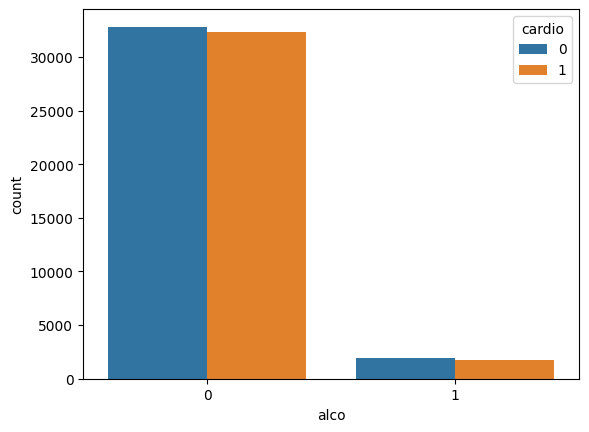

In [71]:
sns.countplot(data= df, x='alco', hue='cardio')

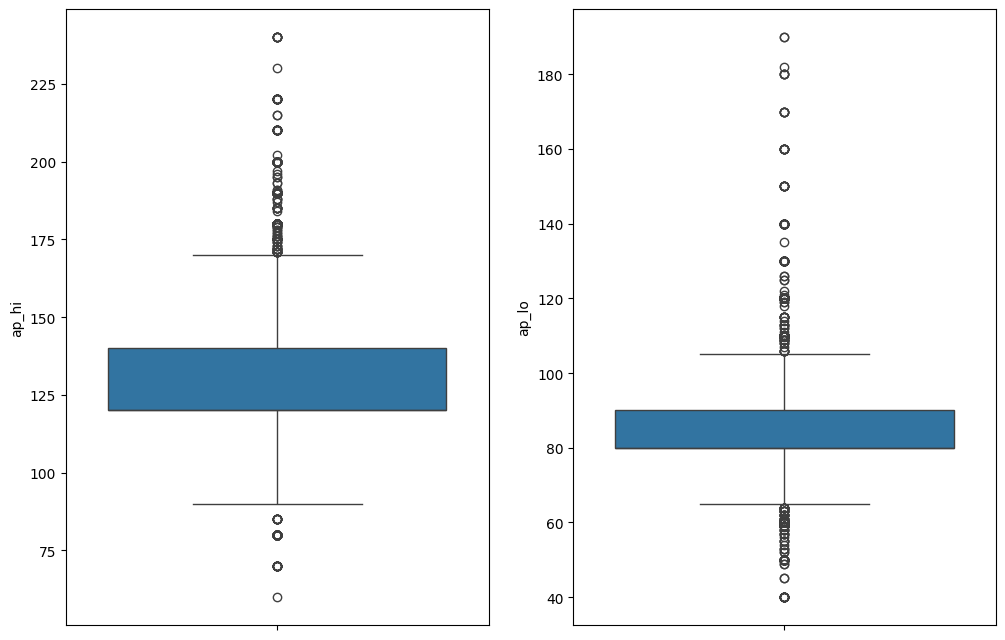

In [72]:
fig, ax= plt.subplots(1,2, figsize= (12,8))
sns.boxplot(data=df , y='ap_hi',ax=ax[0])
plt.subplot(1,2,2)
sns.boxplot(data = df, y= 'ap_lo', ax =ax[1])
plt.show()

## Andel sjukdomar

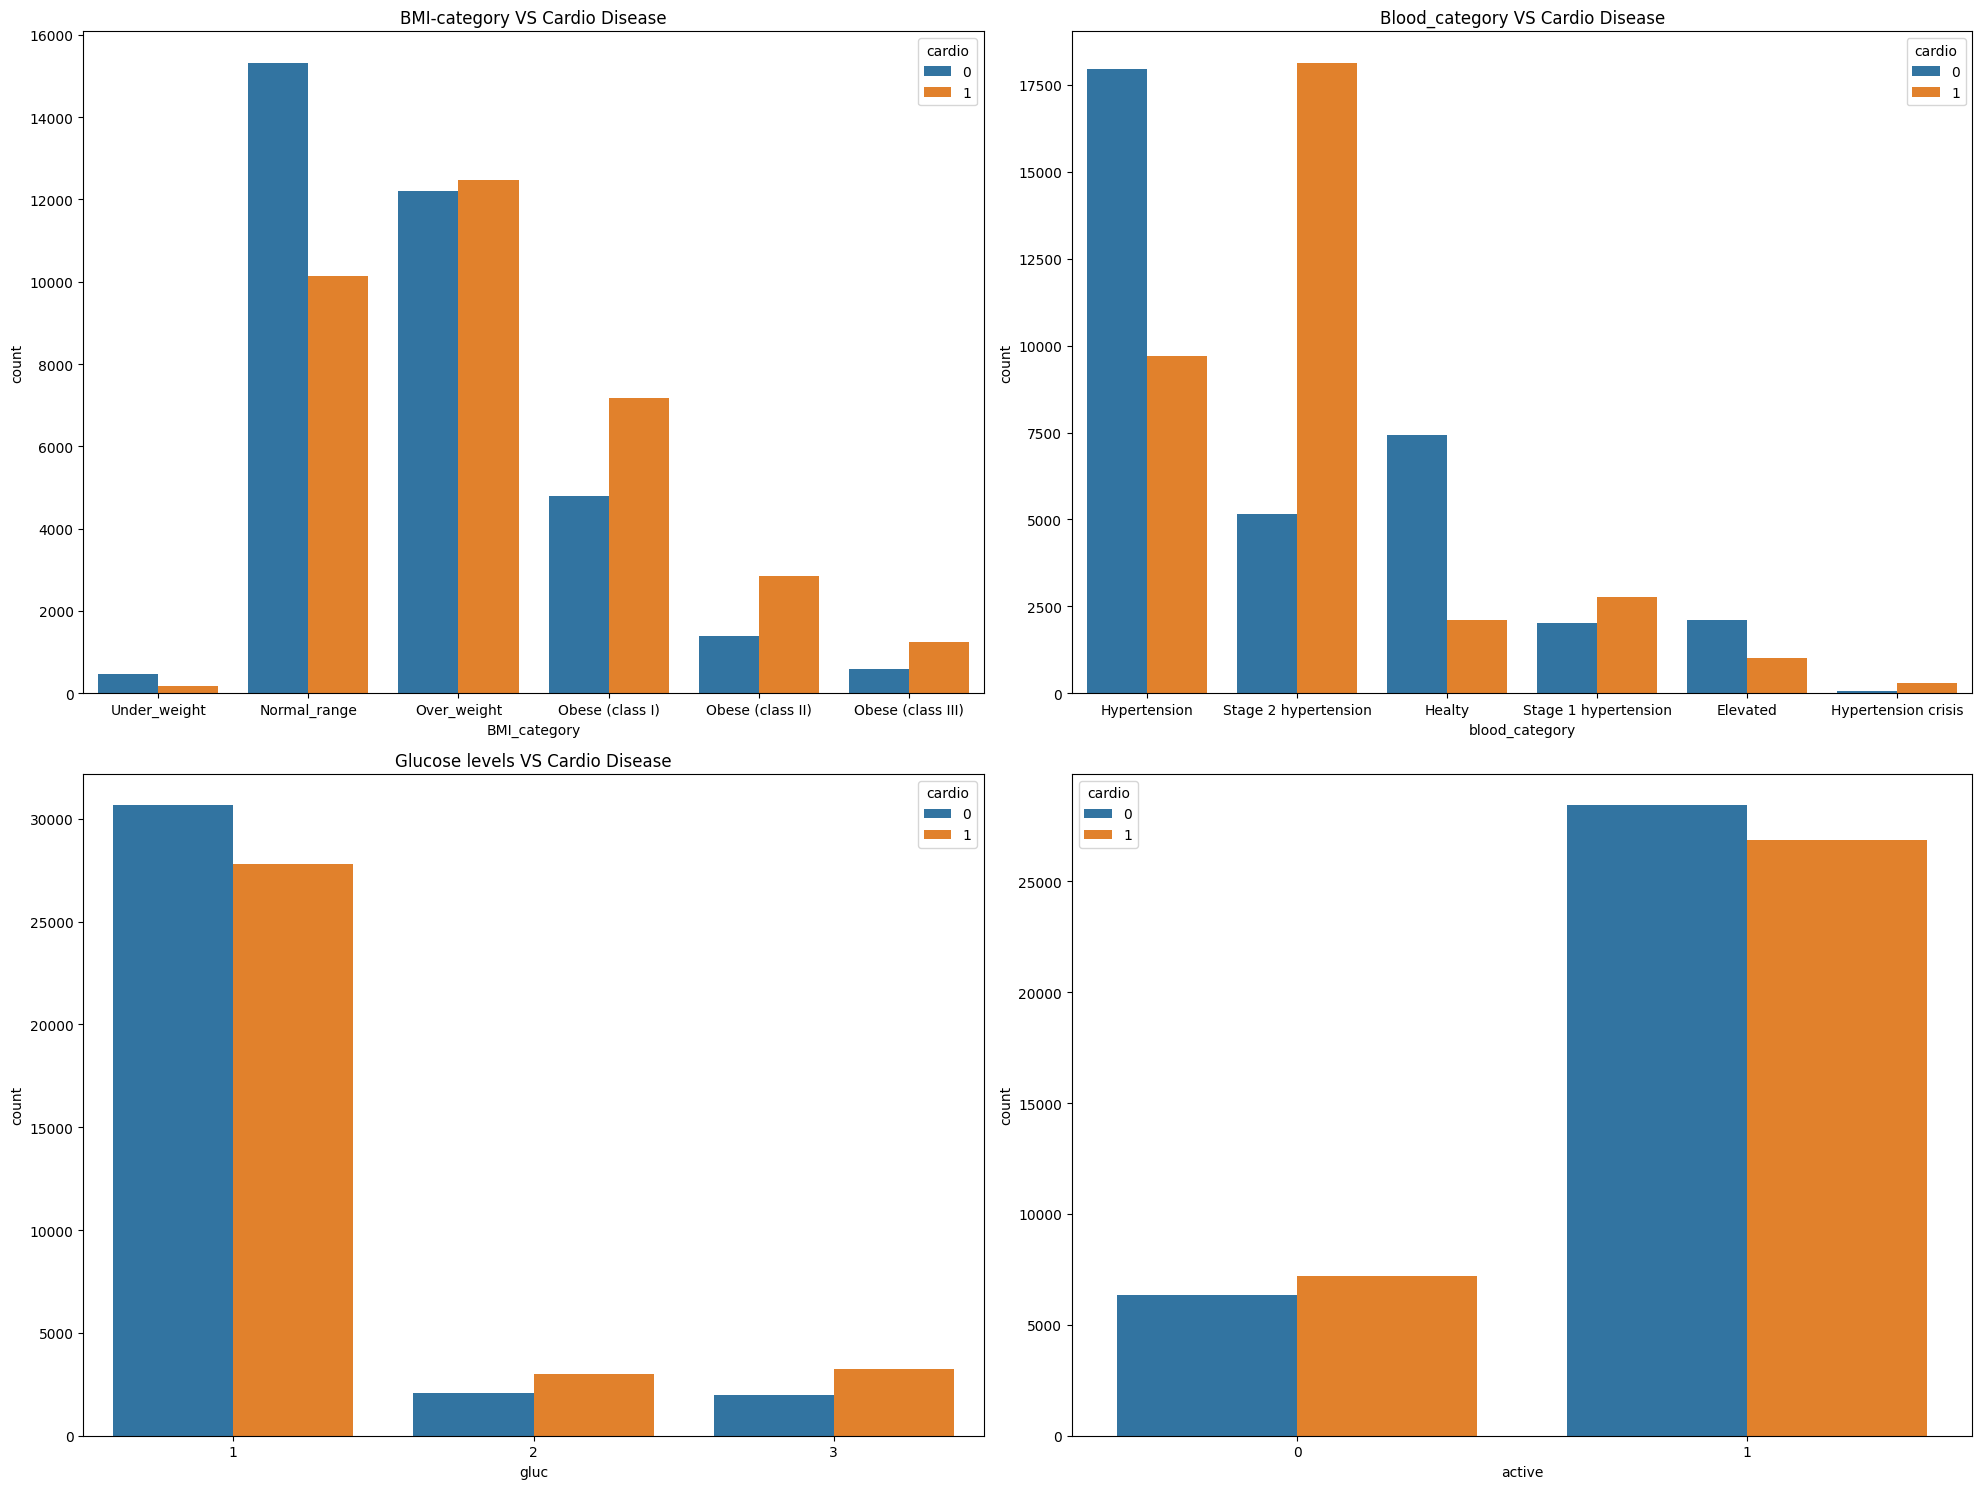

In [73]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(data=df, x='BMI_category', hue='cardio', order=['Under_weight','Normal_range','Over_weight','Obese (class I)','Obese (class II)','Obese (class III)'], ax=ax[0, 0])
ax[0, 0].set_title("BMI-category VS Cardio Disease")

sns.countplot(data=df, x='blood_category', hue='cardio', ax=ax[0, 1])
ax[0, 1].set_title("Blood_category VS Cardio Disease")

sns.countplot(data=df, x='gluc', hue='cardio', ax=ax[1, 0])
ax[1, 0].set_title("Glucose levels VS Cardio Disease")

sns.countplot(data=df, x='active', hue='cardio', ax=ax[1, 1])
ax[1, 1].set_title("")


plt.tight_layout()
plt.show()

## Korrelation

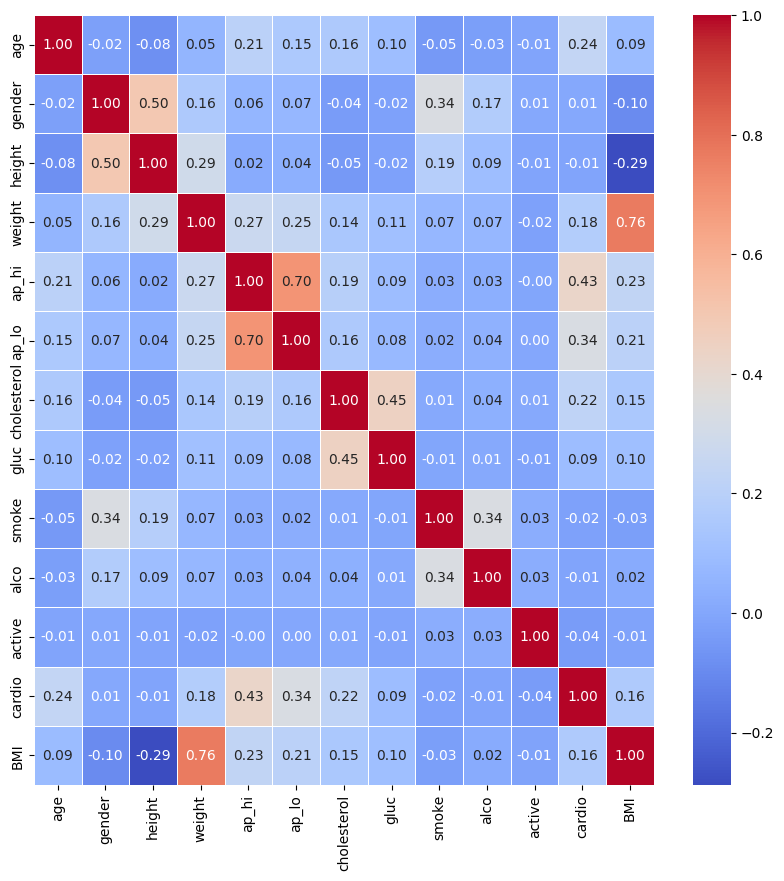

In [74]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

### I Korrelationsanalysen vi kan se att vissa variabler har starka samband medan andra har svag korrelation. Vikt och BMI har en stark korrelation(0.76), medan längden och BMI har svag relation eftersom korrelation (-0.29).

## Dataset

In [75]:
df1.head()

,age,cholesterol,gluc,smoke,alco,active,cardio,blood_category_Elevated,blood_category_Healty,blood_category_Hypertension,...,blood_category_Stage 1 hypertension,blood_category_Stage 2 hypertension,BMI_category_Normal_range,BMI_category_Obese (class I),BMI_category_Obese (class II),BMI_category_Obese (class III),BMI_category_Over_weight,BMI_category_Under_weight,gender_1,gender_2
0,50,1,1,0,0,1,0,False,False,True,...,False,False,True,False,False,False,False,False,False,True
1,55,3,1,0,0,1,1,False,False,False,...,False,True,False,True,False,False,False,False,True,False
2,51,3,1,0,0,0,1,False,False,True,...,False,False,True,False,False,False,False,False,True,False
3,48,1,1,0,0,1,1,False,False,False,...,False,True,False,False,False,False,True,False,False,True
4,47,1,1,0,0,0,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [76]:
df2.head()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_1,gender_2
0,50,110,80,1,1,0,0,1,0,21.967120,False,True
1,55,140,90,3,1,0,0,1,1,34.927679,True,False
2,51,130,70,3,1,0,0,0,1,23.507805,True,False
3,48,150,100,1,1,0,0,1,1,28.710479,False,True
4,47,100,60,1,1,0,0,0,0,23.011177,True,False


### ML modeller

In [77]:

lr_pred1 , rf_pred1, kn_pred1 , y_test1 = cardio.train_model(df1)


Random Forest-Accuracy: 0.7039693694566956

 Random Forest- Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71     10422
           1       0.71      0.68      0.69     10211

    accuracy                           0.70     20633
   macro avg       0.70      0.70      0.70     20633
weighted avg       0.70      0.70      0.70     20633

Logistic Regression-Accuracy: 0.7232103911210197

 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10422
           1       0.75      0.67      0.70     10211

    accuracy                           0.72     20633
   macro avg       0.73      0.72      0.72     20633
weighted avg       0.73      0.72      0.72     20633

KNN-Accuracy: 0.6826927737120148

 KNN- Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68     1

In [78]:
lr_pred2 , rf_pred2, kn_pred2 , y_test2 = cardio.train_model(df2)

Random Forest-Accuracy: 0.6888479620026172

 Random Forest- Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69     10422
           1       0.68      0.70      0.69     10211

    accuracy                           0.69     20633
   macro avg       0.69      0.69      0.69     20633
weighted avg       0.69      0.69      0.69     20633

Logistic Regression-Accuracy: 0.7259244898948287

 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10422
           1       0.75      0.67      0.71     10211

    accuracy                           0.73     20633
   macro avg       0.73      0.73      0.72     20633
weighted avg       0.73      0.73      0.72     20633

KNN-Accuracy: 0.6950031502932196

 KNN- Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70     1